In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

## Initial Set up

In [11]:
#Initial Set up
def EOM(E,B,vi,q,m,steps,dt,vel=False):
    #start at 0 position with no acceleration
    r=np.array([0,0,0])
    a=[0,0,0]
    #Step counter
    i=0
    #Initial velocity
    v=vi
    #Where the results go
    res=[]
    while i<steps:
        #Compute acceleration at given time(more specifically velocity)
        a=(q/m)*(E+(np.cross(v,B)))
        #Add this to the current velocity, repeat for position
        v=v+a*dt
        r=r+v*dt
        #This is just recording time too, useful later
        t=i*dt
        #Record position and velocities at given time
        event=[r[0],r[1],r[2],t]
        velocities=[v[0],v[1],v[2],t]
        if vel==False:
            res.append(event)
        else:
            res.append(velocities)
        i+=1
        #Transpose needed for indexing correctly/easily
    return np.transpose(res)
    
    
    

In [12]:
def RK2(f, dx, x0, y0, imax,args):
    output = np.empty((imax, 3,3))
    i = 0
    xi = x0
    yi = y0
    while(i < imax):
        k1 = dx*np.asarray(f(xi, yi,args[0],args[1],args[2],args[3]))
        k2 = dx*np.asarray(f(xi + dx, yi + k1,args[0],args[1],args[2],args[3]))
        yi = yi + 0.5*(k1 + k2)
        xi += dx
        output[i, 0] = xi
        output[i, 1] = yi[0]
        output[i, 2] = yi[1]
        i += 1
    return np.transpose(output)
def func(t,r,E,B,q,m):
    return [r[1],(q/m)*(E+(np.cross(r[1],B)))]

In [16]:
#Exercise 0
ans=EOM([0,2,0],[0,0,1],[0,0,0],-1.60217663e-19,9.1093837e-31,1e+4,1e-14)
print(np.shape(ans))
print(ans[0])

(4, 10000)
[0.00000000e+00 6.18689563e-20 2.47475825e-19 ... 2.10986217e-10
 2.11000066e-10 2.11013881e-10]


In [9]:
rk2ans=RK2(func,1e-13,0,[[0,0,0],[0,0,0]],1000,(([0,2,0],[0,0,1],-1.602e-19,9.109e-31)))

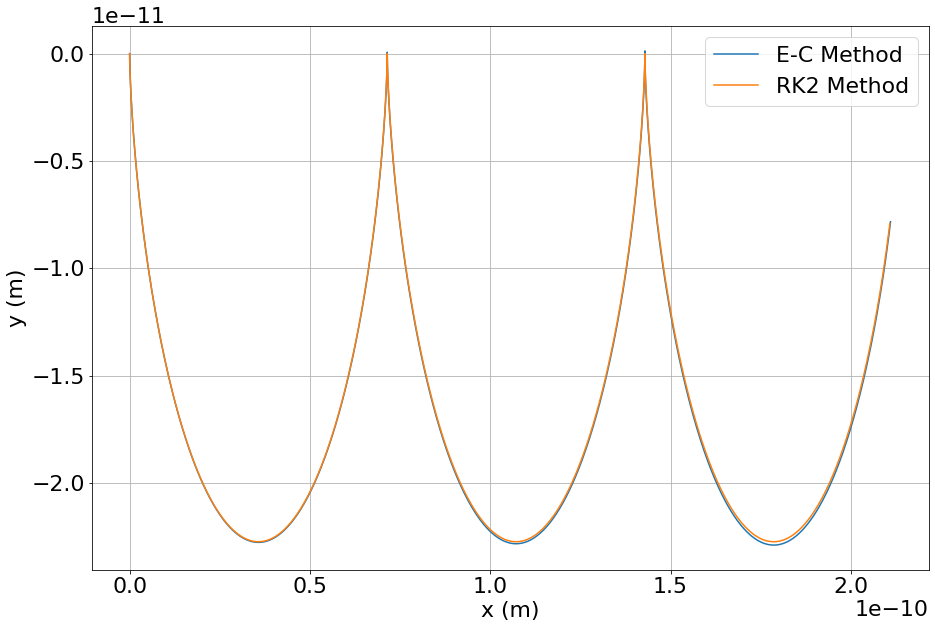

In [17]:
#Inverted from lab manual?
plt.plot(ans[0],ans[1])
plt.plot(rk2ans[0][1],rk2ans[1][1])
plt.grid(True)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(['E-C Method','RK2 Method'])
#plt.xlim(0.71445e-10,0.71455e-10)

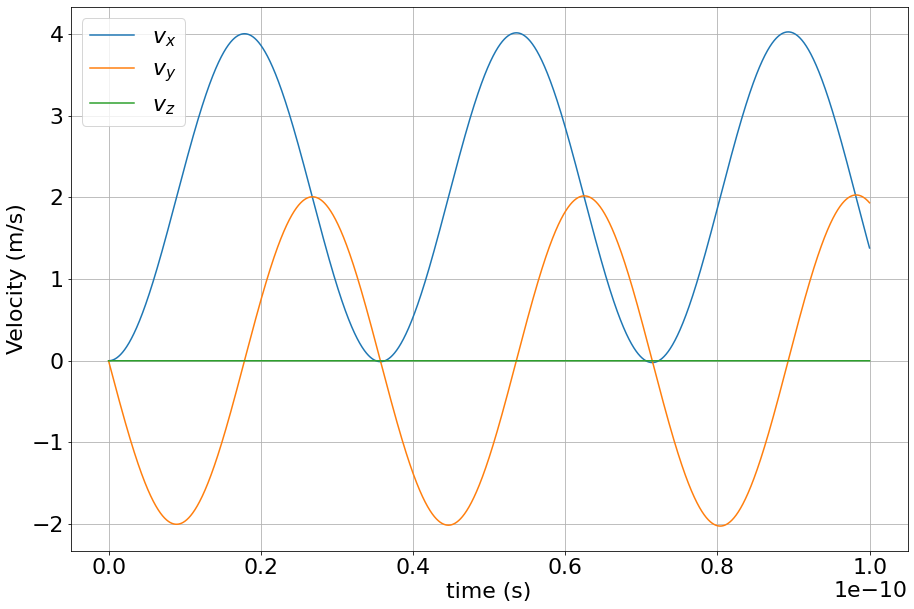

In [15]:
ansa=EOM([0,2,0],[0,0,1],[0,0,0],-1.60217663e-19,9.1093837e-31,1e+4,1e-14,vel=True)
plt.plot(ansa[3],ansa[0])
plt.plot(ansa[3],ansa[1])
plt.plot(ansa[3],ansa[2])
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend(['$v_x$','$v_y$','$v_z$'])
#Velocity oscillation period is the cyclotron period
#plt.xlim(0.355e-10,0.36e-10)
#plt.ylim(-0.5,0.5)

## Exercise 1

In [6]:
#Exercise 1
ans2=EOM([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,1e+6,1e-12)
ans2RK2=RK2(func,1e-10,0,[[0,0,0],[100,0,0]],10000,(([0,2,0],[0,0,1],1.602e-19,1.67262192e-27)))

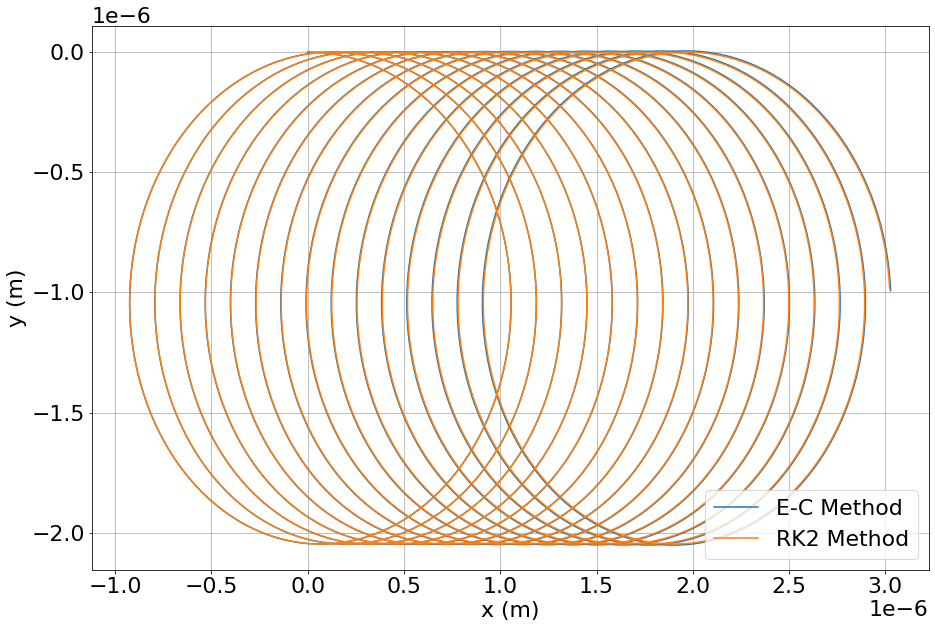

In [7]:
plt.plot(ans2[0],ans2[1])
plt.plot(ans2RK2[0][1],ans2RK2[1][1])
plt.grid(True)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(['E-C Method','RK2 Method'])
#Need to use step size 100 times smaller for E-C to get the same results of RK2

In [8]:
ans2a=EOM([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,1e+6,1e-12,vel=True)

#plt.xlim(6.53e-8,6.58e-8)

Text(0, 0.5, 'Velocity (m/s)')

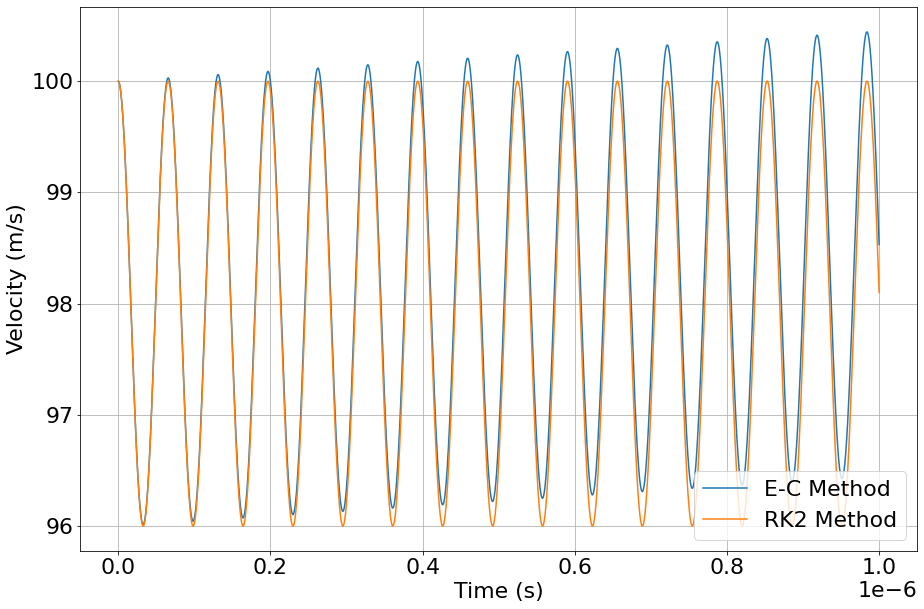

In [11]:
plt.plot(ans2a[3],np.sqrt(ans2a[0]**2+ans2a[1]**2+ans2a[2]**2))
plt.plot(ans2RK2[0][0],(ans2RK2[0][2]**2+ans2RK2[1][2]**2+ans2RK2[2][2]**2)**0.5)
plt.grid(True)
plt.legend(['E-C Method','RK2 Method'])
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
#Note how RK2 is better as velocity does not increase over time, the degree to which it increases
#with decreasing step size

## Exercise 2

In [29]:
#Exercise 2
ans3=EOM([0,2,0],[0,0,1],[0,0,100],1.60217663e-19,1.67262192e-27,1e+5,1e-11)

Text(0.5, 0, 'Z (m)')

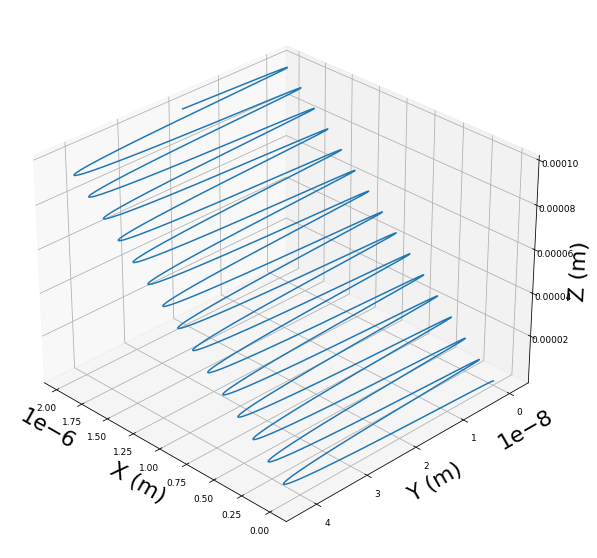

In [52]:
ax3 = plt.figure().add_subplot(projection='3d')
ax3.view_init(30,135)
ax3.plot(ans3[0],ans3[1],ans3[2])
ax3.tick_params(axis='both', labelsize=9)
plt.xlabel('X (m)',labelpad=5)
plt.ylabel('Y (m)',labelpad=5)
ax3.set_zlabel('Z (m)',labelpad=5)

Text(0, 0.5, 'Y (m)')

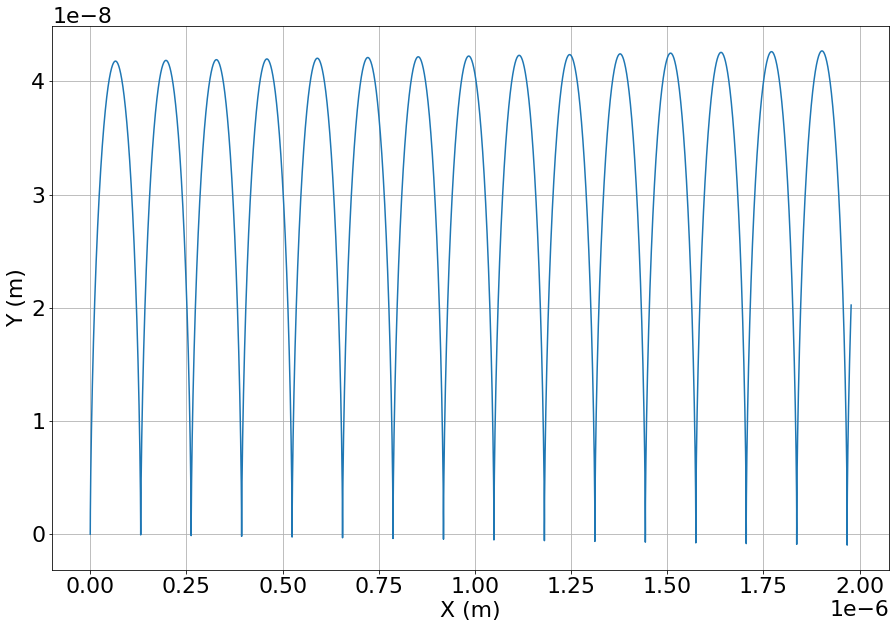

In [53]:
plt.plot(ans3[0],ans3[1])
plt.grid(True)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

Text(0, 0.5, 'Z (m)')

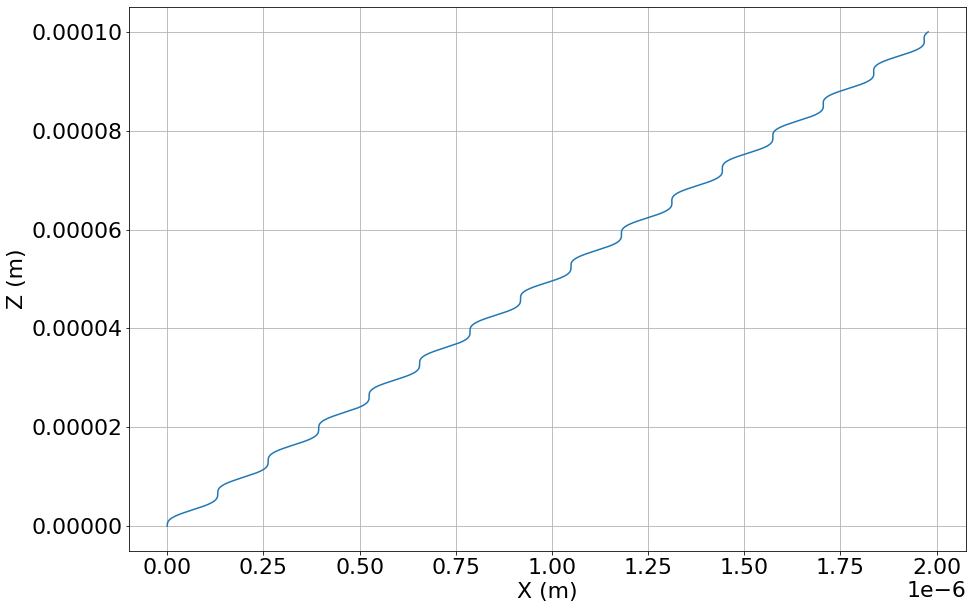

In [54]:
plt.plot(ans3[0],ans3[2])
plt.grid(True)
plt.xlabel('X (m)')
plt.ylabel('Z (m)')

In [12]:
ans3a=EOM([0,2,0],[0,0,1],[0,0,100],1.60217663e-19,1.67262192e-27,1e+5,1e-11,vel=True)

(0.0, 5e-07)

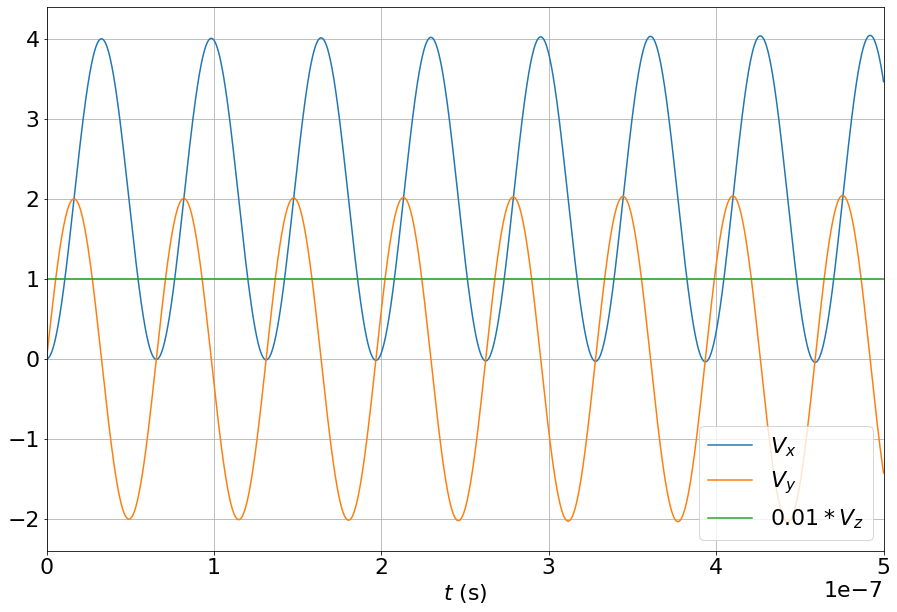

In [20]:
plt.plot(ans3a[3],ans3a[0])
plt.plot(ans3a[3],ans3a[1])
plt.plot(ans3a[3],[0.01*el for el in ans3a[2]])
plt.grid(True)
plt.xlabel('$v$ (m/s)')
plt.xlabel('$t$ (s)')
plt.legend(['$V_x$','$V_y$','$0.01*V_z$'])
plt.xlim(0,0.5e-6)
         

## Exercise 3

In [22]:
#Exercise 3
ans4=EOM([0,2,0],[0,0,1],[100,0,0],-1.60217663e-19,9.1093837e-31,1e+6,1e-15,vel=True)
ans4RK2=RK2(func,1e-13,0,[[0,0,0],[100,0,0]],10000,(([0,2,0],[0,0,1],-1.602e-19,9.1093837e-31)))


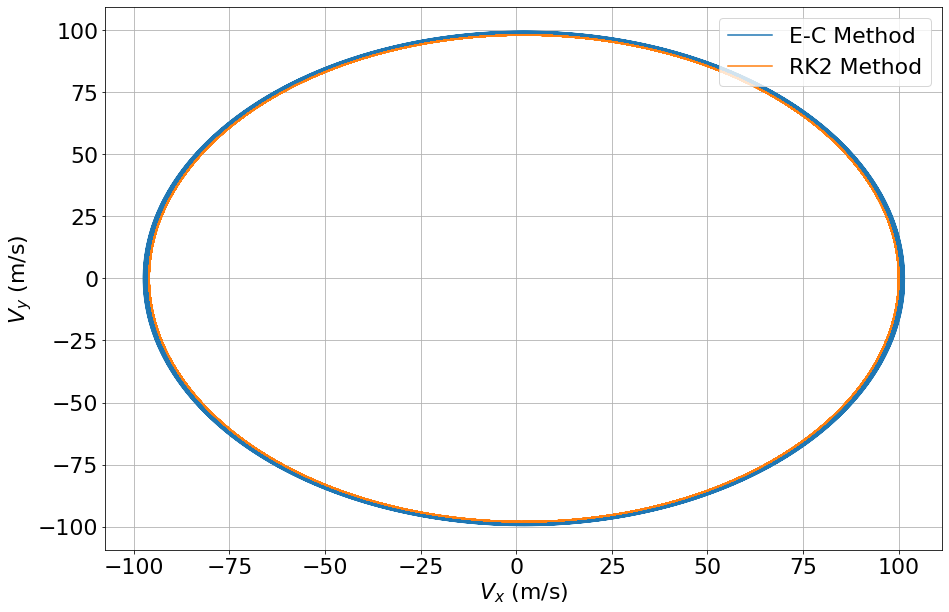

In [27]:
plt.plot(ans4[0],ans4[1])
plt.plot(ans4RK2[0][2],ans4RK2[1][2])
plt.xlabel('$V_{x}$ (m/s)')
plt.ylabel('$V_{y}$ (m/s)')
plt.legend(['E-C Method','RK2 Method'],loc='upper right')
plt.grid(True)

## Exercise 4

In [4]:
#Exercise 4
def EOM2(E,B,vi,q,m,dt,vel=False):
    r=np.array([0,0,0])
    a=[0,0,0]
    T=2*np.pi*m/(np.absolute(q)*(B[0]**2+B[1]**2+B[2]**2)**(0.5))
    print(T)
    i=0
    v=vi
    res=[]
    t=0
    while t<=T:
        a=(q/m)*(E+(np.cross(v,B)))
        v=v+a*dt
        r=r+v*dt
        t=i*dt
        event=[r[0],r[1],r[2],t]
        velocities=[v[0],v[1],v[2],t]
        if vel==False:
            res.append(event)
        else:
            res.append(velocities)
        i+=1
    return np.transpose(res)

3.572386761208795e-11


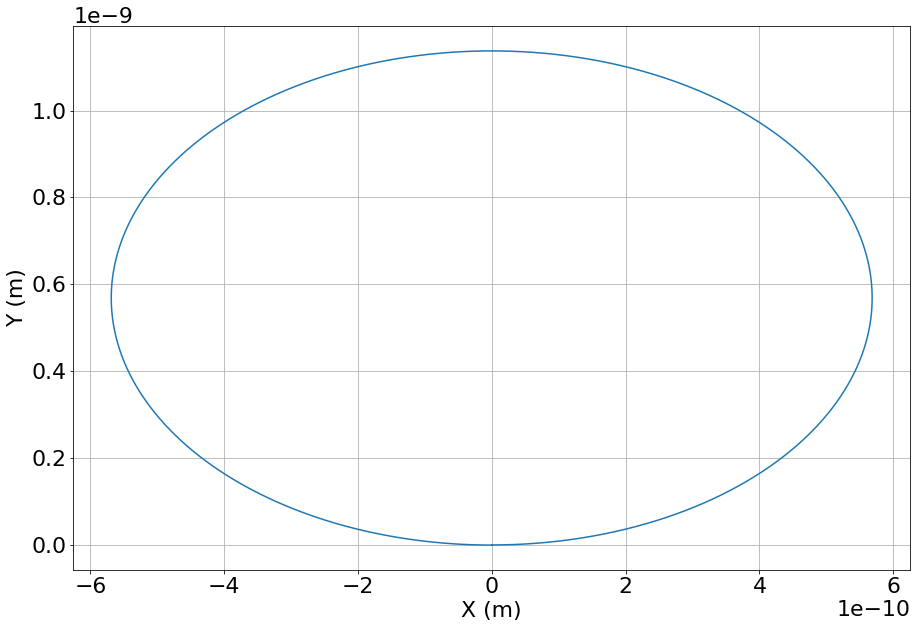

In [5]:
#Unsure what the starting conds are since if the velocity is left in the z direction
#there is no fields as cross product is zero
#Presume its asking for position?
#No point doing RK2 since errors on a single run around are minimal

ans5=EOM2([0,0,0],[0,0,1],[100,0,0],-1.60217663e-19,9.1093837e-31,1e-15,vel=False)
plt.plot(ans5[0],ans5[1])
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)

3.572386761208795e-11


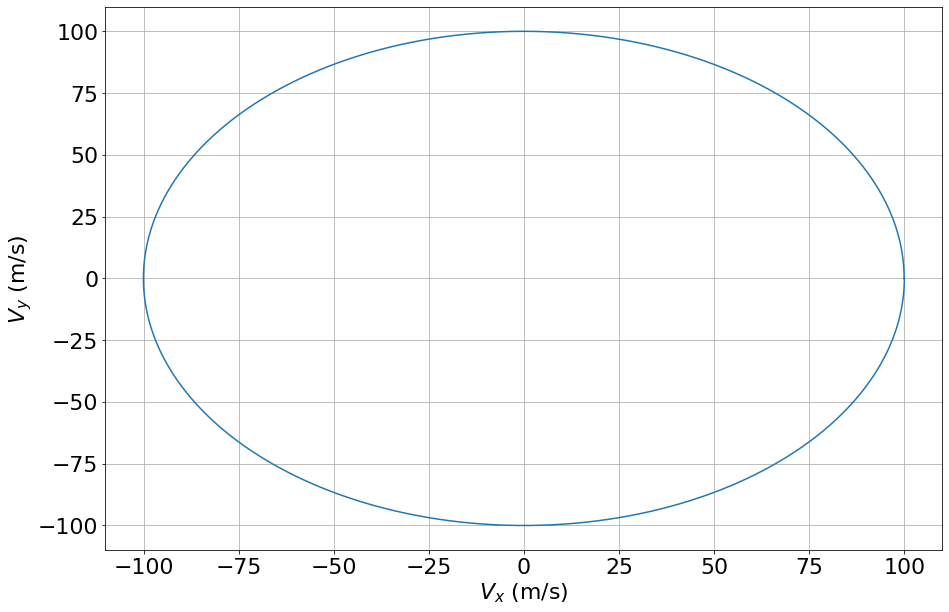

In [71]:

ans5a=EOM2([0,0,0],[0,0,1],[100,0,0],-1.60217663e-19,9.1093837e-31,1e-15,vel=True)
plt.plot(ans5a[0],ans5a[1])
plt.xlabel('$V_x$ (m/s)')
plt.ylabel('$V_y$ (m/s)')
plt.grid(True)

## Exercise 5

In [29]:
#Exercise 5
def Bfunc(r):
    return [0,0,np.absolute(r[0])*1e+11]
def EOM3(E,vi,q,m,steps,dt,vel=False):
    #start at 0 position with no acceleration
    r=np.array([0,0,0])
    a=[0,0,0]
    #Step counter
    i=0
    #Initial velocity
    v=vi
    #Where the results go
    res=[]
    while i<steps:
        B=Bfunc(r)
        #Compute acceleration at given time(more specifically velocity)
        a=(q/m)*(E+(np.cross(v,B)))
        #Add this to the current velocity, repeat for position
        v=v+a*dt
        r=r+v*dt
        #This is just recording time too, useful later
        t=i*dt
        #Record position and velocities at given time
        event=[r[0],r[1],r[2],t]
        velocities=[v[0],v[1],v[2],t]
        if vel==False:
            res.append(event)
        else:
            res.append(velocities)
        i+=1
        #Transpose needed for indexing correctly/easily
    return np.transpose(res)


In [30]:
def SpecRK2(f, dx, x0, y0, imax,args):
    output = np.empty((imax, 3,3))
    i = 0
    xi = x0
    yi = y0
    while(i < imax):
        B=Bfunc(yi[0])
        k1 = dx*np.asarray(f(xi, yi,args[0],B,args[1],args[2]))
        k2 = dx*np.asarray(f(xi + dx, yi + k1,args[0],B,args[1],args[2]))
        yi = yi + 0.5*(k1 + k2)
        xi += dx
        output[i, 0] = xi
        output[i, 1] = yi[0]
        output[i, 2] = yi[1]
        i += 1
    return np.transpose(output)

In [37]:
ans6=EOM3([0,2,0],[100,0,0],1.60217663e-19,1.67262192e-27,1e+6,1e-15,vel=True)
ans6RK2=SpecRK2(func,1e-14,0,[[0,0,0],[100,0,0]],100000,(([0,2,0],1.602e-19,1.67262192e-27)))
ans6RK2a=SpecRK2(func,1e-15,0,[[0,0,0],[100,0,0]],1000000,(([0,2,0],1.602e-19,1.67262192e-27)))
print(np.shape(ans6))

(4, 1000000)


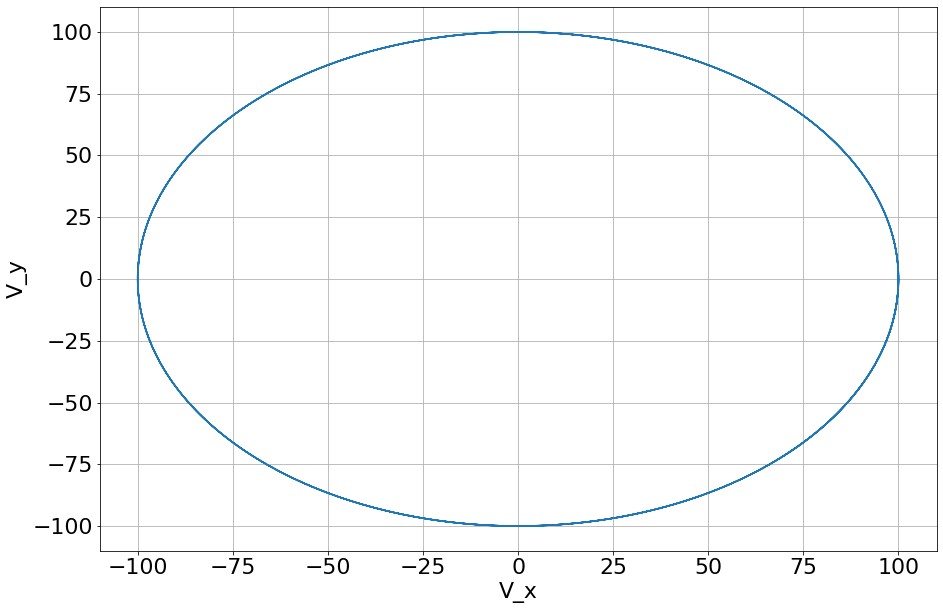

In [32]:
plt.plot(ans6[0],ans6[1])
plt.xlabel('V_x')
plt.ylabel('V_y')
plt.grid(True)

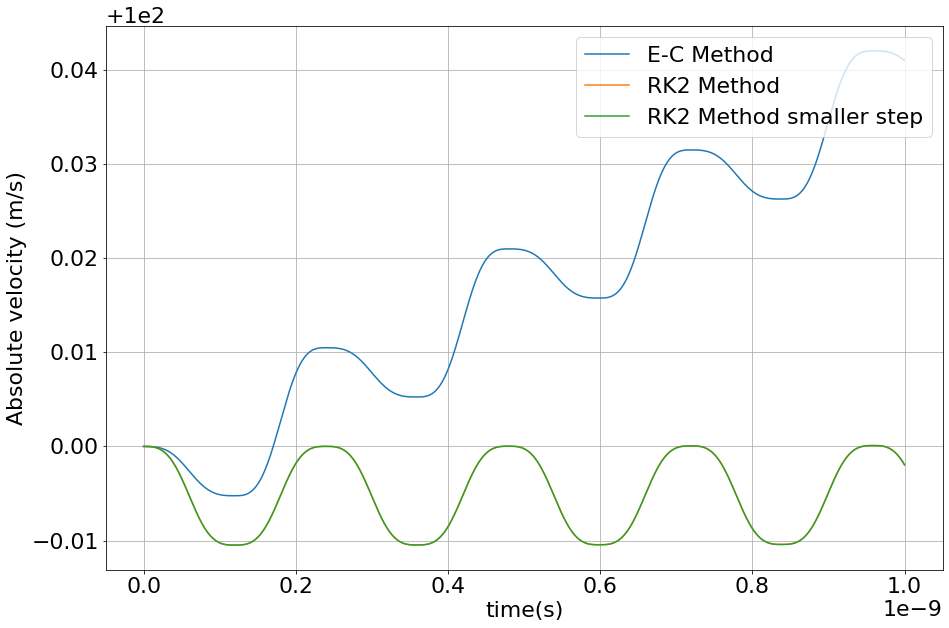

In [39]:
#Just thought this was interesting from the data obtained
plt.plot(ans6[3],(ans6[0]**2+ans6[1]**2+ans6[2]**2)**(0.5))
plt.plot(ans6RK2[0][0],(ans6RK2[0][2]**2+ans6RK2[1][2]**2+ans6RK2[2][2]**2)**0.5)
plt.plot(ans6RK2a[0][0],(ans6RK2a[0][2]**2+ans6RK2a[1][2]**2+ans6RK2a[2][2]**2)**0.5)
plt.xlabel('time(s)')
plt.ylabel('Absolute velocity (m/s)')
plt.grid(True)
plt.legend(['E-C Method','RK2 Method','RK2 Method smaller step'],loc='upper right')



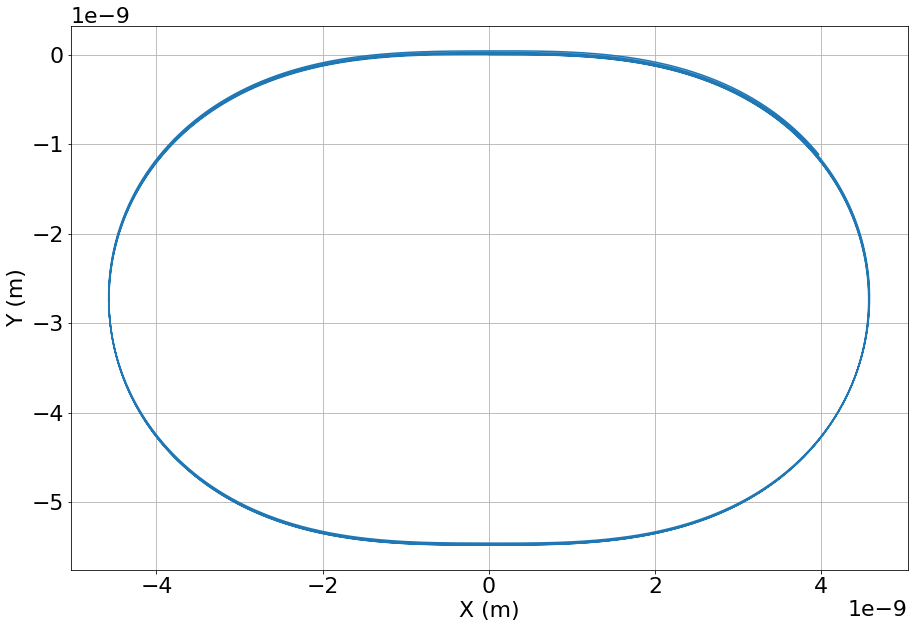

In [41]:
ans7=EOM3([0,2,0],[100,0,0],1.60217663e-19,1.67262192e-27,1e+5,1e-14,vel=False)
plt.plot(ans7[0],ans7[1])
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)

## Exercise 6.0

In [42]:
#Exercise 6
ans8a=EOM([-5,0,0],[0,0,1],[0,0,0],-1.60217663e-19,9.1093837e-27,1e+5,1e-11)

Text(0, 0.5, 'Y (m)')

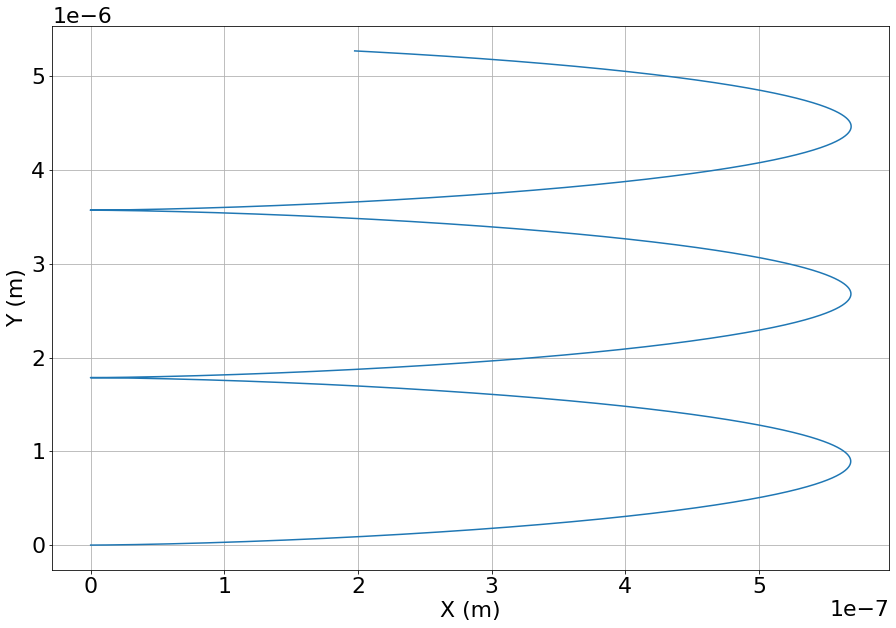

In [43]:
plt.plot(ans8a[0],ans8a[1])
plt.grid(True)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

## Exercise 6.1

6.5594474887644e-08


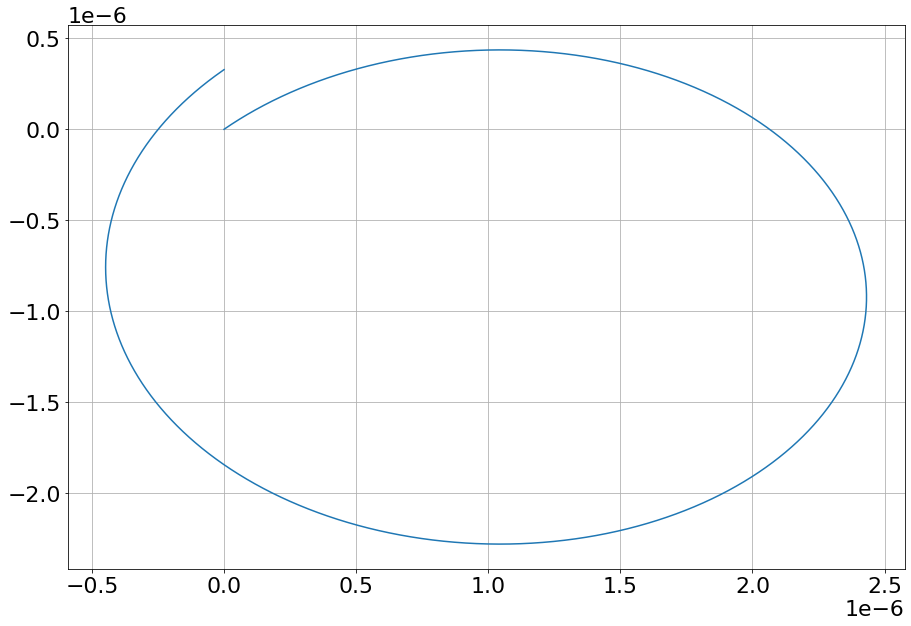

In [15]:
#Exercise 6.1
ans8=EOM2([-5,0,0],[0,0,1],[100,100,0],1.60217663e-19,1.67262192e-27,1e-13)
plt.plot(ans8[0],ans8[1])
plt.grid(True)

In [6]:
ans9=EOM([-5,0,0],[0,0,1],[100,100,0],1.60217663e-19,1.67262192e-27,1e+6,1e-12)
ans11=EOM([-5,0,0],[0,0,1],[100,100,0],1.60217663e-19,1.67262192e-27,1e+5,1e-11)
ans9RK2=RK2(func,1e-9,0,[[0,0,0],[100,100,0]],1000,(([-5,0,0],[0,0,1],1.602e-19,1.67262192e-27)))

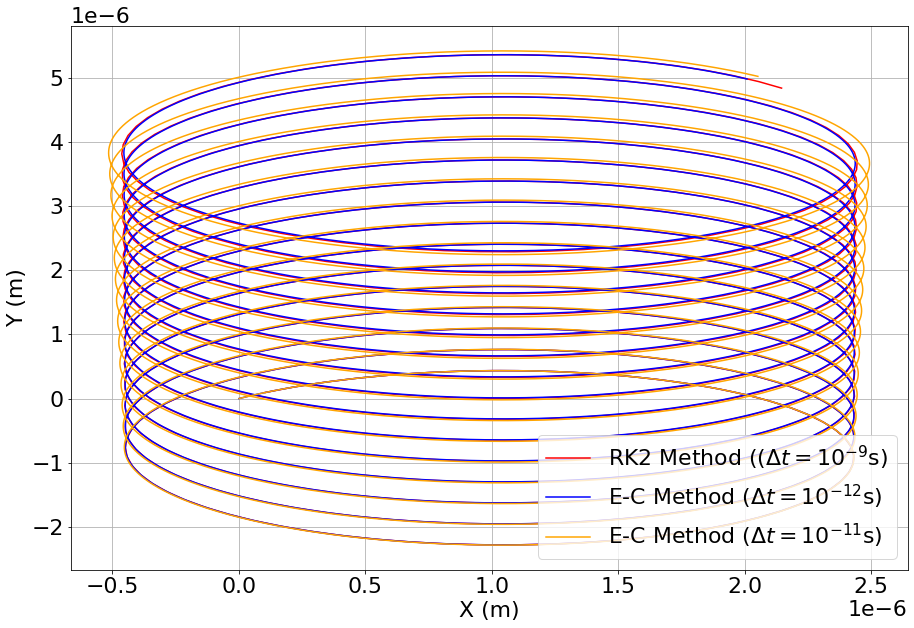

In [7]:
plt.plot(ans9RK2[0][1],ans9RK2[1][1],color='r')
plt.plot(ans9[0],ans9[1],color='blue')
plt.plot(ans11[0],ans11[1],color='orange')
plt.grid(True)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.legend(['RK2 Method (($\Delta t =10^{-9}$s)','E-C Method ($\Delta t =10^{-12}$s)','E-C Method ($\Delta t =10^{-11}$s)'],\
           loc='lower right')
#Function does not appear to be well behaved with E-C method
#If a larger step size is picked for E-C it is dramatically off
#Note How very good agreement required 1/1000th of the step size

## Exercise 6.2:

In [55]:
#Exercise 6.2
ans12=EOM([-5,0,0],[0,0,1],[0,100,100],1.60217663e-19,1.67262192e-27,1e+6,1e-12)

Text(0.5, 0, 'Z (m)')

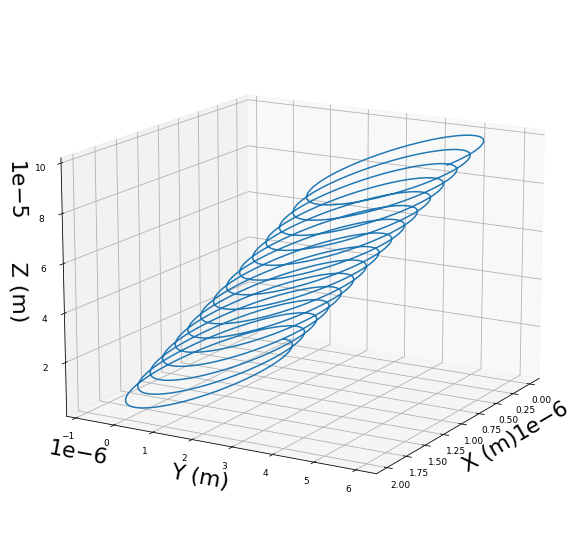

In [63]:
ax4 = plt.figure().add_subplot(projection='3d')
ax4.plot(ans12[0],ans12[1],ans12[2])
ax4.view_init(15,30)
ax4.tick_params(axis='both', labelsize=9)
plt.xlabel('X (m)',labelpad=5)
plt.ylabel('Y (m)',labelpad=5)
ax4.set_zlabel('Z (m)',labelpad=5)

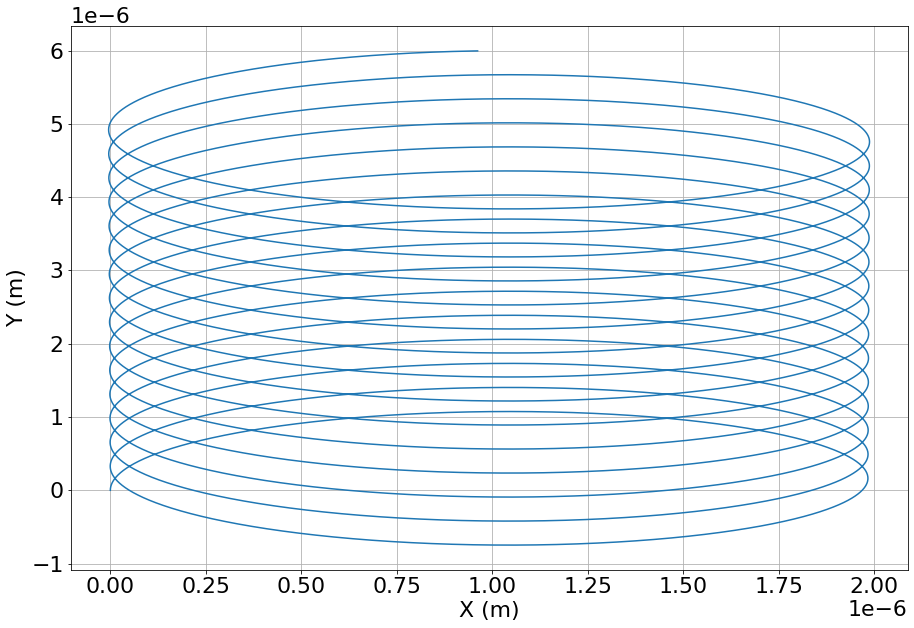

In [64]:
plt.plot(ans12[0],ans12[1])
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
#plt.plot(ans12[0],ans12[2])
plt.grid(True)

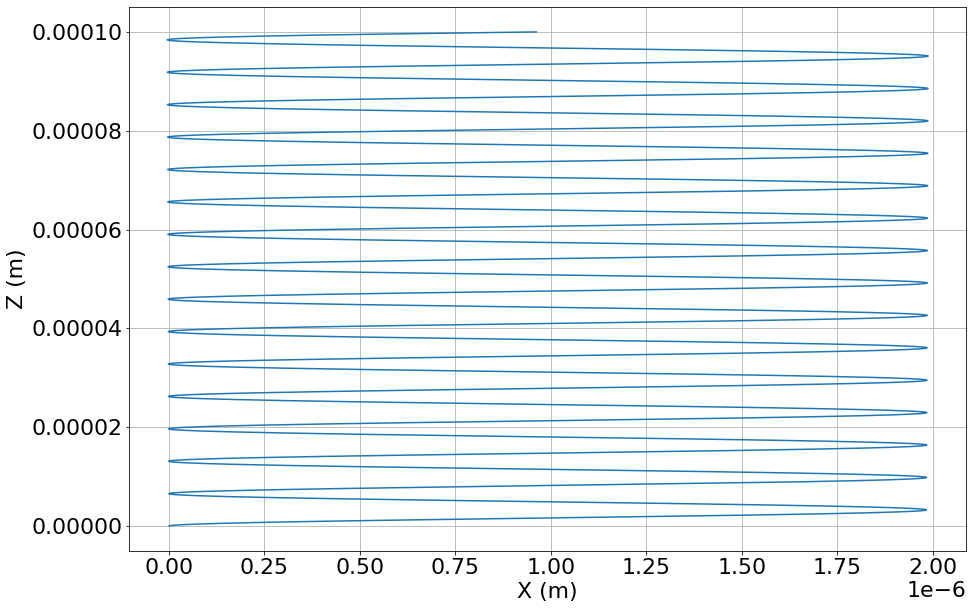

In [65]:
plt.plot(ans12[0],ans12[2])
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.grid(True)

## Exercise 6.3

In [66]:
#Exercise 6.3
ans13=EOM([-5,0,0],[0,0,1],[100,100,0],1.60217663e-19,1.67262192e-27,1e+6,1e-12,vel=True)

Text(0, 0.5, '$V_y$ (m/s)')

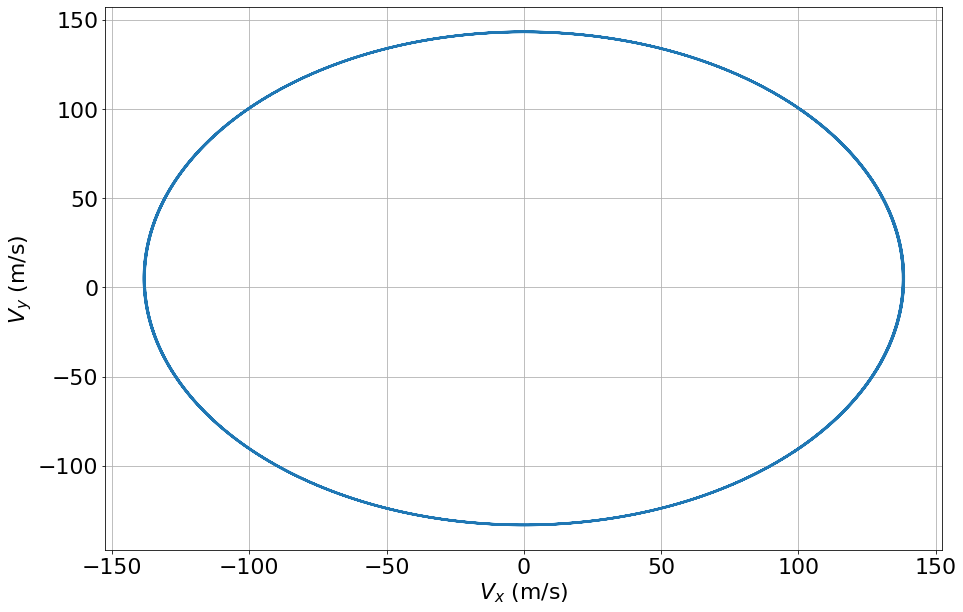

In [68]:
plt.plot(ans13[0],ans13[1])
plt.grid(True)
plt.xlabel('$V_x$ (m/s)')
plt.ylabel('$V_y$ (m/s)')

## Exercise 6.4

In [6]:
#Exercise 6.4
ans14=EOM2([0,0,0],[0,0,1],[100,100,0],1.60217663e-19,9.1093837e-31,1e-16,vel=False)

3.572386761208795e-11


3.572386761208795e-11


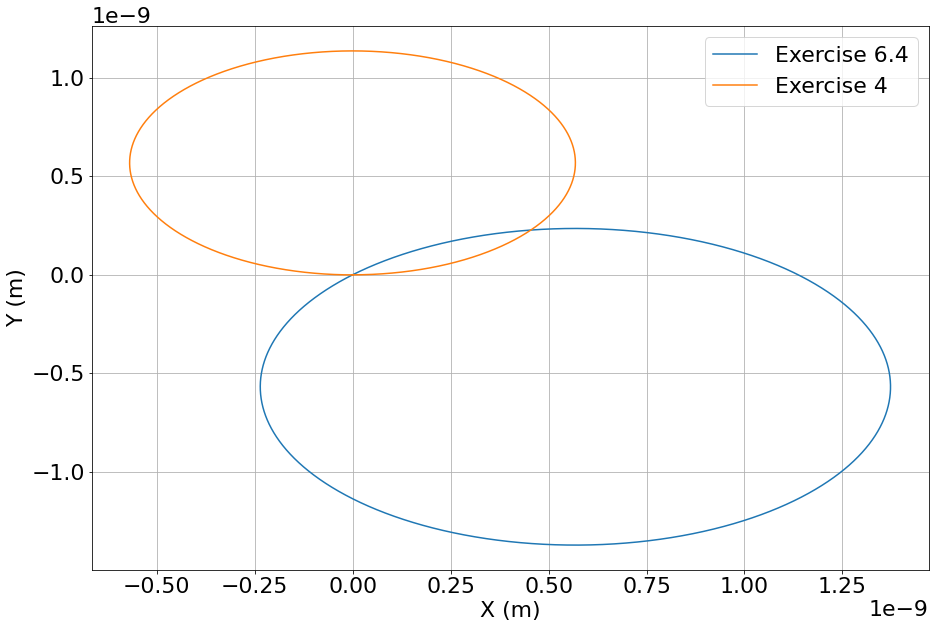

In [9]:
plt.plot(ans14[0],ans14[1])
ans5=EOM2([0,0,0],[0,0,1],[100,0,0],-1.60217663e-19,9.1093837e-31,1e-15,vel=False)
plt.plot(ans5[0],ans5[1])
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.legend(['Exercise 6.4','Exercise 4'])

## Exercise 6.5

(4, 1000000)


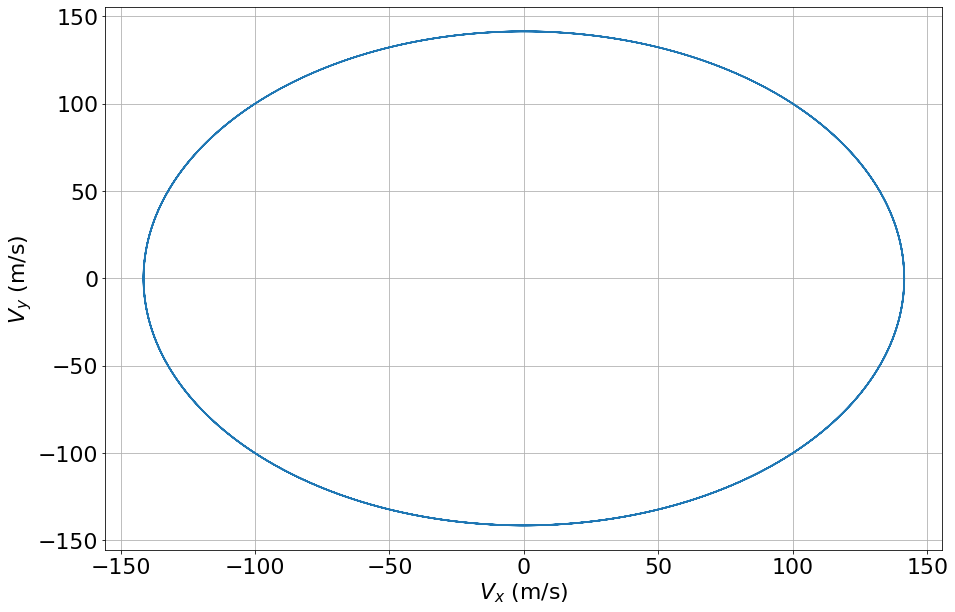

In [74]:
#Exercise 6.5
ans15=EOM3([-5,0,0],[100,100,0],1.60217663e-19,1.67262192e-27,1e+6,1e-15,vel=True)
print(np.shape(ans15))
plt.plot(ans15[0],ans15[1])
plt.xlabel('$V_x$ (m/s)')
plt.ylabel('$V_y$ (m/s)')
plt.grid(True)
#Tighter spread than position?

In [90]:
ans16=EOM3([-5,0,0],[100,100,0],1.60217663e-19,1.67262192e-27,1e+6,1e-15,vel=False)
ans5RK2=SpecRK2(func,1e-13,0,[[0,0,0],[100,100,0]],10000,(([-5,0,0],1.602e-19,1.67262192e-27)))
ans6RK2=SpecRK2(func,1e-14,0,[[0,0,0],[100,100,0]],100000,(([-5,0,0],1.602e-19,1.67262192e-27)))
#ans7RK2=SpecRK2(func,1e-15,0,[[0,0,0],[100,100,0]],1000000,(([-5,0,0],1.602e-19,1.67262192e-27)))

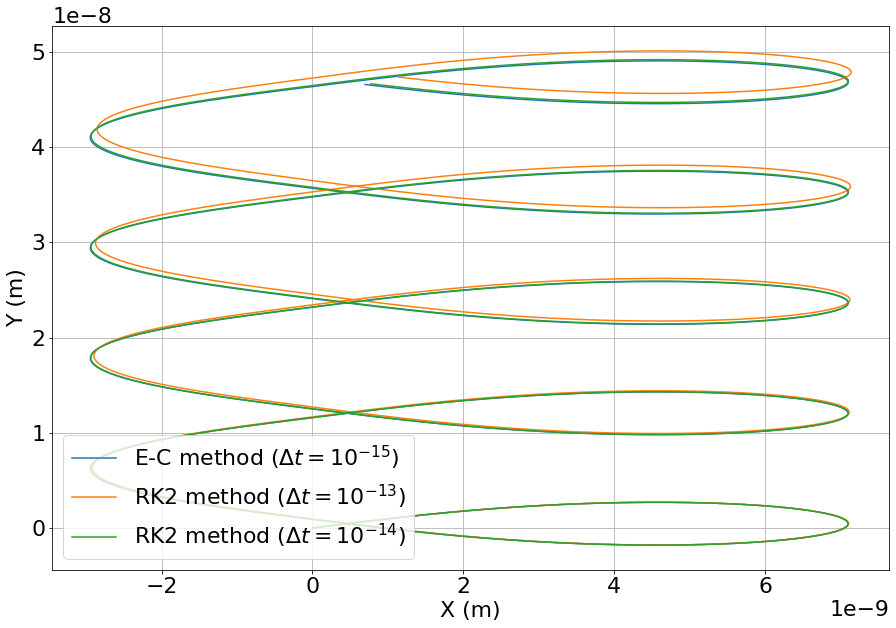

In [92]:
plt.plot(ans16[0],ans16[1])
plt.plot(ans5RK2[0][1],ans5RK2[1][1])
plt.plot(ans6RK2[0][1],ans6RK2[1][1])
#plt.plot(ans7RK2[0][1],ans7RK2[1][1])
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.legend(['E-C method ($\Delta t =10^{-15}$)','RK2 method ($\Delta t =10^{-13}$)','RK2 method ($\Delta t =10^{-14}$)'],\
          loc='lower left')
plt.grid(True)
#Very little difference in difference in step size for small RK2 and E-C
#Smaller E-C not practical
#Larger RK2 disagrees, smaller RK2 doesnt differ, therefore convergence

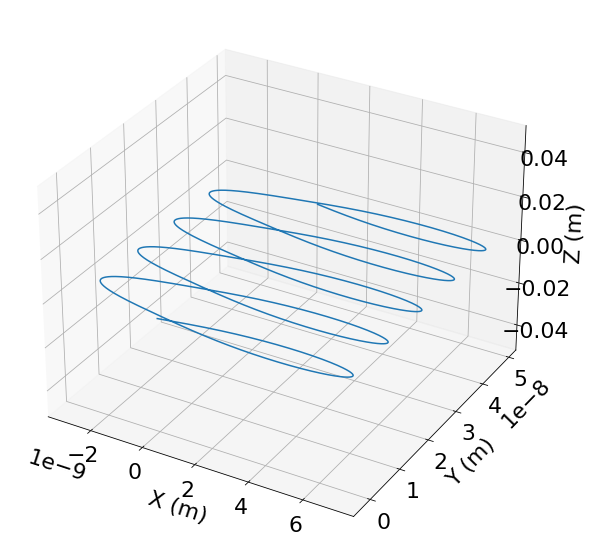

In [108]:
ax5 = plt.figure().add_subplot(projection='3d')
ax5.plot(ans16[0],ans16[1],ans16[2])
plt.xlabel('X (m)',labelpad=9)
plt.ylabel('Y (m)',labelpad=9)
ax5.set_zlabel('Z (m)',labelpad=13)
ax4.tick_params(axis='both', labelsize=9)

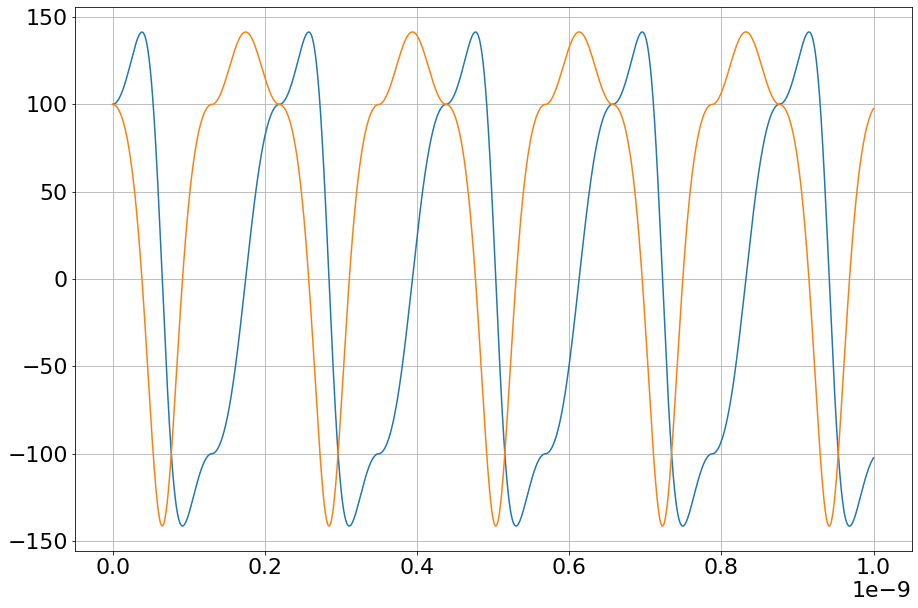

In [102]:
plt.plot(ans15[3],ans15[0])
plt.plot(ans15[3],ans15[1])
plt.grid(True)

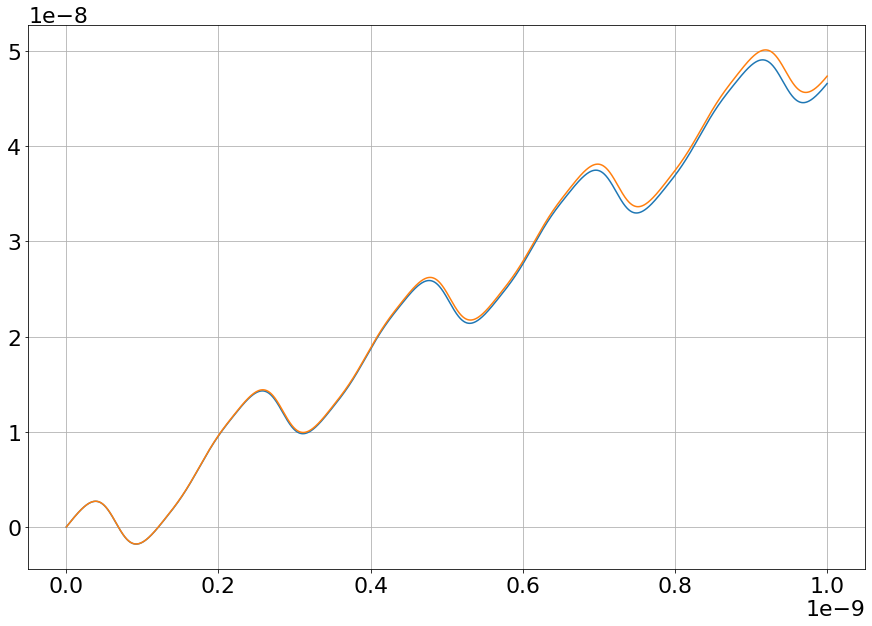

In [101]:
plt.plot(ans16[3],ans16[1])
plt.plot(ans5RK2[0][0],ans5RK2[1][1])
plt.grid(True)
#Good agreement, be careful with indexing

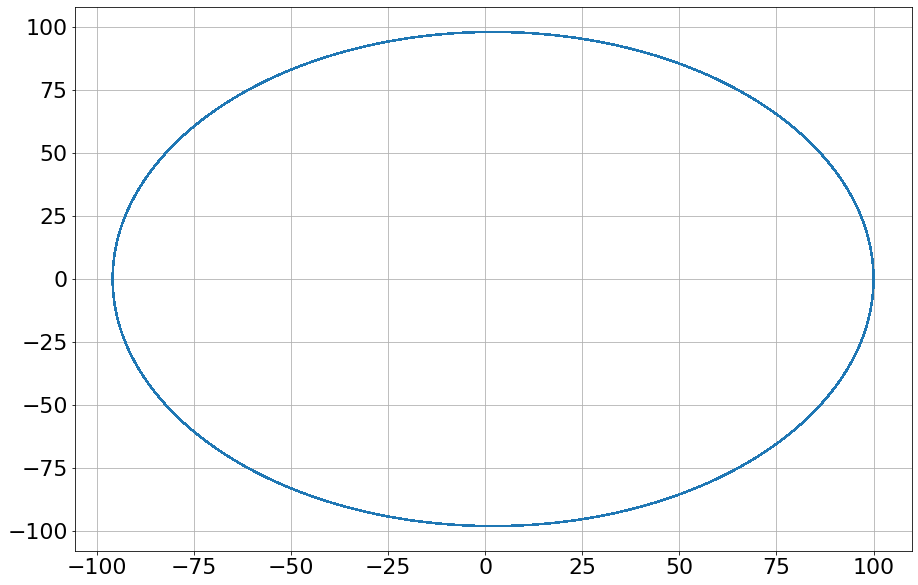

In [25]:
from scipy.integrate import odeint
def dv_dt(v,t,E,B,q,m):
    return (q/m)*(E+(np.cross(v,B)))
t1=np.linspace(0,1e-7,1000000)
v1=np.transpose(odeint(dv_dt,[100,0,0],t1,args=(([0,2,0],[0,0,1],-1.602e-19,9.109e-31))))
plt.plot(v1[0],v1[1])

plt.grid(True)

## Error Analysis

In [70]:
#Errors
err1=EOM([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,1e+6,1e-11)
err2=EOM([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,5e+5,2e-11)
err3=EOM([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,2.5e+5,4e-11)
errRK2=RK2(func,1e-9,0,[[0,0,0],[100,0,0]],10000,(([0,2,0],[0,0,1],1.602e-19,1.67262192e-27)))


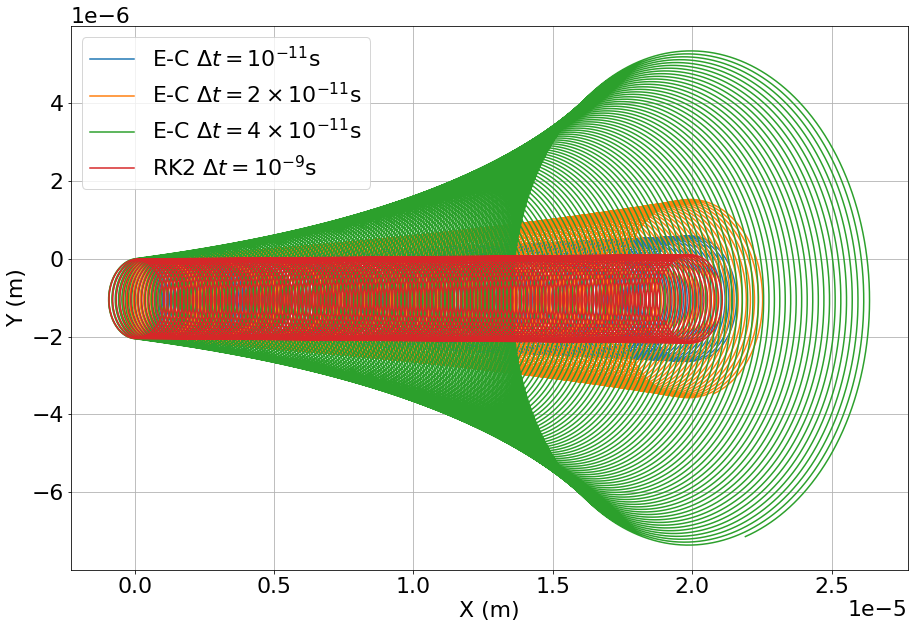

In [79]:
plt.plot(err1[0],err1[1])
plt.plot(err2[0],err2[1])
plt.plot(err3[0],err3[1])
plt.plot(errRK2[0][1],errRK2[1][1])
plt.grid(True)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.legend([r'E-C $\Delta t = 10^{-11}$s',r'E-C $\Delta t = 2 \times 10^{-11}$s',r'E-C $\Delta t = 4 \times 10^{-11}$s','RK2 $\Delta t = 10^{-9}$s'])

In [123]:
print(np.shape(err1),np.shape(err2),np.shape(err3),np.shape(errRK2))
error1=np.sqrt((err1[0][::100]-(errRK2[0][1]))**2+(err1[1][::100]-(errRK2[1][1]))**2)
error2=np.sqrt((err2[0][::50]-(errRK2[0][1]))**2+(err2[1][::50]-(errRK2[1][1]))**2)
error3=np.sqrt((err3[0][::25]-(errRK2[0][1]))**2+(err3[1][::25]-(errRK2[1][1]))**2)
print(np.shape(error1))

(4, 1000000) (4, 500000) (4, 250000) (3, 3, 10000)
(10000,)


In [136]:
from scipy.optimize import curve_fit
def quad(x,a,b,c):
    return a*x**2 +b*x+c
nspace=np.linspace(0,10000,10000)
popt, pcov =curve_fit(quad,nspace,error3)

In [137]:
print(popt)

[5.10817114e-14 9.18420529e-11 1.92417340e-07]


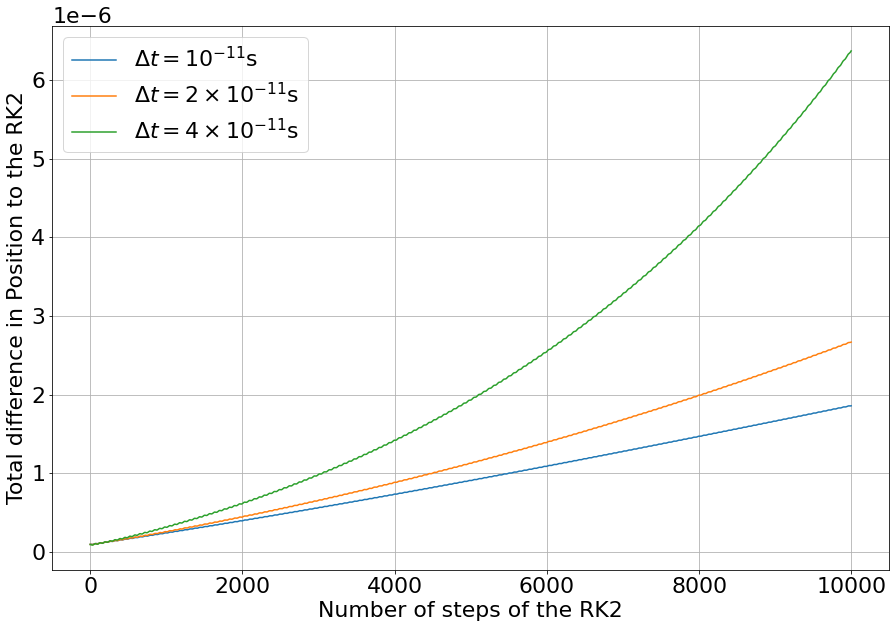

In [154]:
plt.plot(error1)
plt.plot(error2)
plt.plot(error3)
#plt.plot(nspace,quad(nspace,popt[0],popt[1],popt[2]))
#plt.plot(error4)
#plt.plot(np.sqrt(err2[0]**2+err2[1]**2))
#plt.plot(np.sqrt(err2[1][0:50000]**2+err2[1][0:50000]**2))
plt.grid(True)
plt.xlabel('Number of steps of the RK2')
plt.ylabel('Total difference in Position to the RK2')
plt.legend([r'$\Delta t= 10^{-11}$s',r'$\Delta t= 2 \times 10^{-11}$s',r'$\Delta t= 4 \times 10^{-11}$s'])

In [69]:
err2[0][4]

9.999856129816512e-09

In [27]:
def Err(E,B,vi,q,m,tf,dt,vel=False):
    #start at 0 position with no acceleration
    r=np.array([0,0,0])
    a=[0,0,0]
    #Step counter
    i=0
    #Initial velocity
    v=vi
    #Where the results go
    res=[]
    while i<(tf/dt):
        #Compute acceleration at given time(more specifically velocity)
        a=(q/m)*(E+(np.cross(v,B)))
        #Add this to the current velocity, repeat for position
        v=v+a*dt
        r=r+v*dt
        #This is just recording time too, useful later
        t=i*dt
        #Record position and velocities at given time
        event=[r[0],r[1],r[2],t]
        velocities=[v[0],v[1],v[2],t]
        if vel==False:
            res.append(event)
        else:
            res.append(velocities)
        i+=1
        #Transpose needed for indexing correctly/easily
    return np.transpose(res)

In [ ]:
err4=Err([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,2.5e,1e-11)
err5=Err([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,5e+4,2e-11)
err6=Err([0,2,0],[0,0,1],[100,0,0],1.60217663e-19,1.67262192e-27,2.5e+4,4e-11)